# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

- order_id: Unique ID of the order
- customer_id: ID of the customer who ordered the food
- restaurant_name: Name of the restaurant
- cuisine_type: Cuisine ordered by the customer
- cost: Cost of the order
- day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
- rating: Rating given by the customer out of 5
- food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
- delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


### Let us start by importing the required libraries


In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

### Understanding the structure of the data


In [4]:
# read the data
df = pd.read_csv("foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]


In [5]:
# Print the number of rows and columns
print("There are", df.shape[0], "rows and", df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:


There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]


In [7]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


There are 5 numerical columns and 4 object type columns


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]


In [15]:
# Get sum of null values in each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


There are no missing values in the data


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]


In [235]:
# Only grabbing the important columns and showing the description
df[["cost_of_the_order", "food_preparation_time", "delivery_time"]].describe()

,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
mean,16.498851,27.371970,24.161749
std,7.483812,4.632481,4.972637
min,4.470000,20.000000,15.000000
25%,12.080000,23.000000,20.000000
50%,14.140000,27.000000,25.000000
75%,22.297500,31.000000,28.000000
max,35.410000,35.000000,33.000000


#### Observations:


Average prep time: 27.37

Minimum prep time: 20

Maximum Prep Time: 35


### **Question 5:** How many orders are not rated? [1 mark]


In [234]:
# Get length of orders where rating is not given
print("There are", len(df[df["rating"] == "Not given"]), "orders with no rating given")

There are 736 orders with no rating given


#### Observations:


There are 736 orders with no rating given


### Exploratory Data Analysis (EDA)


### Univariate Analysis


### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]


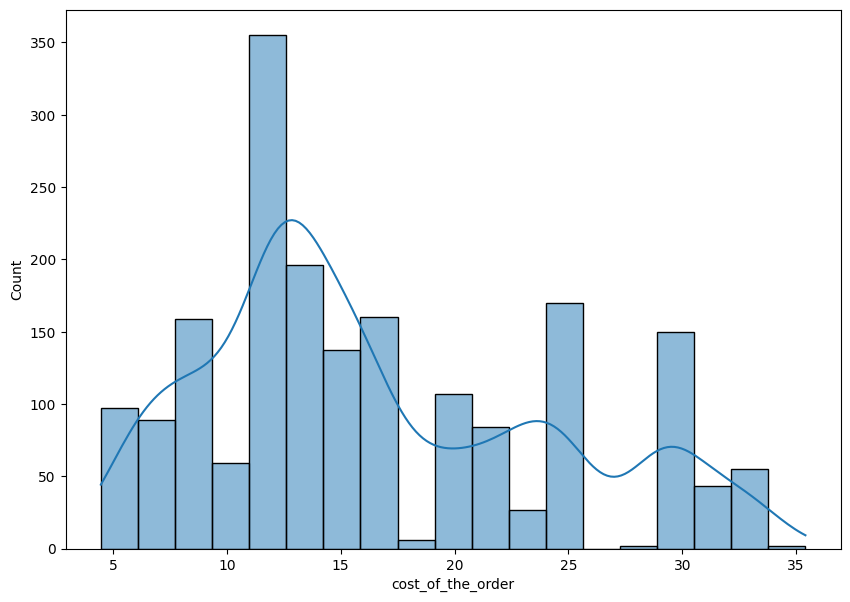

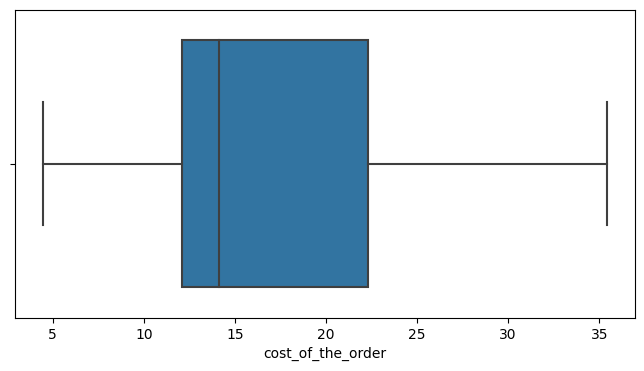

In [150]:
# Adjusting the size
plt.figure(figsize=(10, 7))

# Bar graph for cost of order
sns.histplot(data=df, x="cost_of_the_order", kde=True)

# So they don't merge
plt.show()

# Adjusting the size
plt.figure(figsize=(8, 4))

# Box graph to show skewness of order cost
sns.boxplot(data=df, x="cost_of_the_order")

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]


In [239]:
# Count number of times a restaurant appears in the data and grab first 5
df["restaurant_name"].value_counts().sort_values(ascending=False).head().reset_index()

,restaurant_name,count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:


1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]


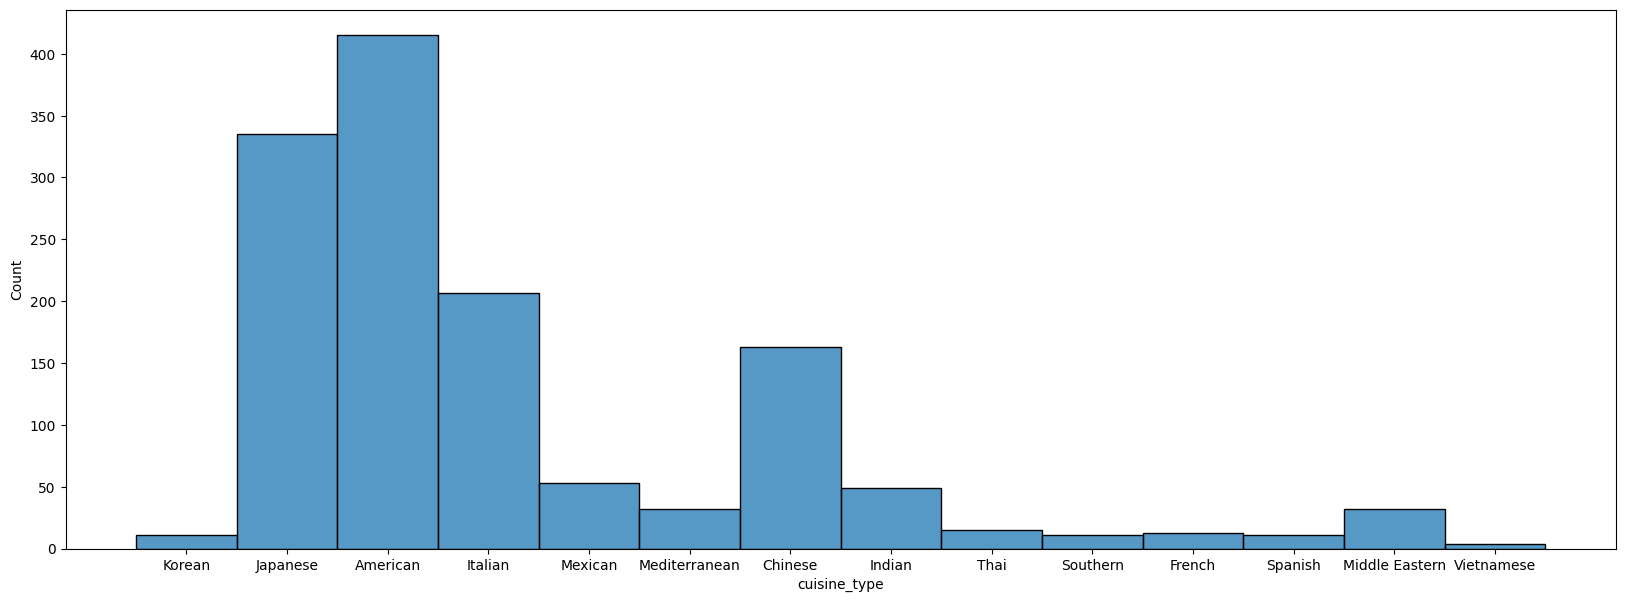

In [240]:
# For readability
plt.figure(figsize=(20, 7))
# Filters out only the weekend orders and plots in a bar graph
sns.histplot(data=df.loc[df["day_of_the_week"] == "Weekend"], x="cuisine_type")

# another way:
# print(df["cuisine_type"].value_counts(normalize=True).sort_values(ascending=False).head(1))

#### Observations:


American food is the most popular on the weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]


In [10]:
# Formats the percentage of orders over 20 dollars to 2 decimal places
print(
    "There are",
    "{:.2%}".format((df["cost_of_the_order"] > 20).sum() / len(df)),
    "of orders over $20",
)

There are 29.24% of orders over $20


#### Observations:


There are 29.24% of orders over $20


### **Question 10**: What is the mean order delivery time? [1 mark]


In [246]:
print(
    "The average delivery time without adding prep time is",
    df["delivery_time"].mean().astype("int"),
    "minutes",
)

The average delivery time without adding prep time is 24 minutes


#### Observations:


The average delivery time without adding prep time is 24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]


In [218]:
# Get all customer ids and count the many times they appear, then grab the top 3
df["customer_id"].value_counts().sort_values(ascending=False).head(3).reset_index()

,customer_id,count
0,52832,13
1,47440,10
2,83287,9


#### Observations:


Customers with ids: 52832, 47440, and 83287 are the top 3 customers with 13, 10, and 9 orders respectively.


### Multivariate Analysis


### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


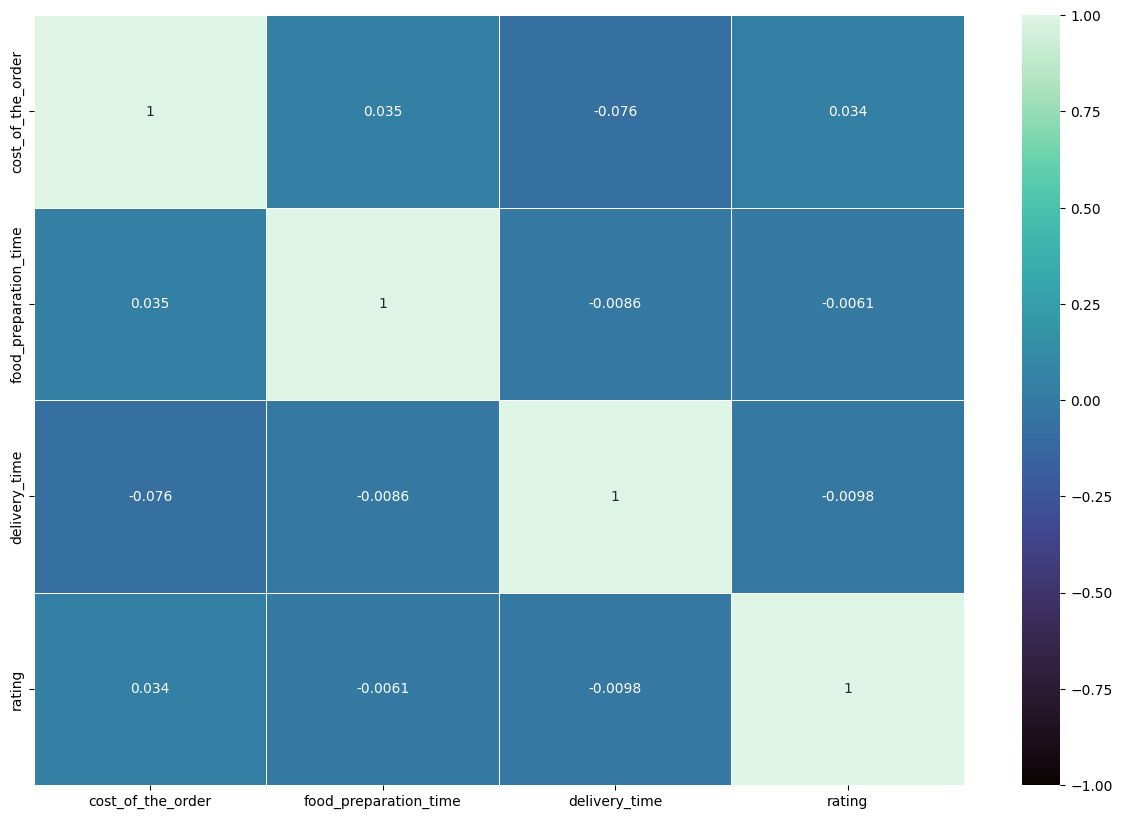

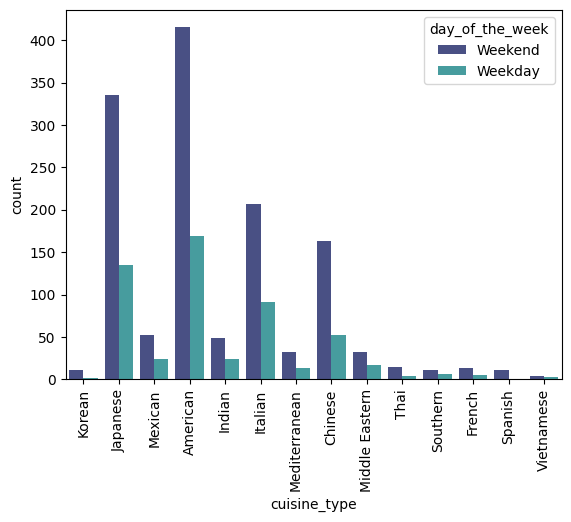

In [249]:
plt.figure(figsize=(15, 10))

# Filter the rated restaurants
data = df[df["rating"] != "Not given"].copy()

# Convert rating column from object to integer
data["rating"] = data["rating"].astype("int")

# Plot heatmap with the columns cost_of_the_order, food_preparation_time, delivery_time, rating to show correlation
sns.heatmap(
    data[
        ["cost_of_the_order", "food_preparation_time", "delivery_time", "rating"]
    ].corr(),
    annot=True,
    cmap=sns.color_palette("mako", as_cmap=True),
    vmin=-1,
    vmax=1,
    linewidth=0.5,
)

# Prevents the plots from being merged
plt.show();

# Styling the bar graph
plt.xticks(rotation=90)

# Bar graph
sns.countplot(data=df, x="cuisine_type", hue="day_of_the_week", palette="mako");

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]


In [75]:
# Filter the rated restaurants
data = df[df["rating"] != "Not given"].copy()

# Convert rating column from object to integer
data["rating"] = data["rating"].astype("int")

# Create a dataframe that contains the restaurant names with their rating counts
rating_count = data["restaurant_name"].value_counts()

# Get the restaurant names that have rating count more than 50
rest_names = rating_count.index[rating_count.gt(50)]

# Filter restaurants that are both in rest_names and original clone
filtered_res = data[data["restaurant_name"].isin(rest_names)]

# Group restaurants and average then sort and reset index to make it pretty
final_data = (
    filtered_res.groupby(["restaurant_name"])["rating"]
    .mean()
    .sort_values()
    .reset_index()
)

# Ensure that the average is greater than 4
final_data[final_data["rating"] > 4]

,restaurant_name,rating
0,Blue Ribbon Sushi,4.219178
1,Shake Shack,4.278195
2,Blue Ribbon Fried Chicken,4.328125
3,The Meatball Shop,4.511905


#### Observations:


Blue Ribbon Sushi, Shake Shack, Blue Ribbon Fried Chicken and The Meatball Shop all qualify for the promo offer


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]


In [116]:
# Get 25% of order cost for orders greater than 20
revenue_gt_twenty = df[(df["cost_of_the_order"] > 20)]["cost_of_the_order"].sum() * 0.25

# Get 15% of order cost for orders greater than 5, but less than 20
revenue_gt_five = (
    df[(df["cost_of_the_order"] > 5) & (df["cost_of_the_order"] < 20)][
        "cost_of_the_order"
    ].sum()
    * 0.15
)

# Print in currency format
print(
    "Total net revenue:",
    "${:,.2f}".format(round(revenue_gt_twenty + revenue_gt_five, 2)),
)

Total net revenue: $6,166.30


#### Observations:


Total net revenue: $6,166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]


In [224]:
# Formats the percentage of orders that take over 60 min to be made and delivered to a single decimal place
print(
    "{:.1%}".format(
        ((df["food_preparation_time"] + df["delivery_time"]) > 60).sum() / len(df)
    ),
    "of orders take over 60 minutes to be delivered",
)

10.5% of orders take over 60 minutes to be delivered


#### Observations:


10.5% of orders take over 60 minutes to be delivered


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]


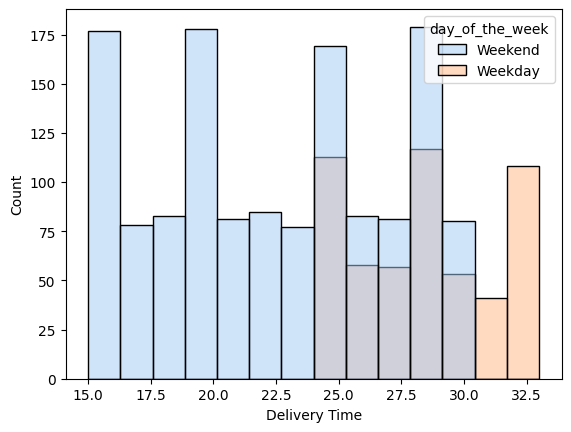

In [247]:
# Making it pretty
plt.xlabel("Delivery Time")

# Plots the delivery time with a hue of day of week to show delivery time variation
sns.histplot(data=df, x="delivery_time", hue="day_of_the_week", palette="pastel");

#### Observations:


### Conclusion and Recommendations


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]


In [227]:
# Formats the percentage of orders over 20 dollars to 2 decimal places
print(
    "{:.2%}".format((df["rating"] == "Not given").sum() / len(df)),
    "of orders aren't reviewed",
)

38.78% of orders aren't reviewed


### Conclusions:

- Around 39% of orders does not have a review. These missing reviews may greatly impact the data skew if they were present.
- Preparation time has less variance compared to delivery time, meaning delivery time is the significant variable in total waiting time.
- American food seems to be the most popular regardless of weekday


### Recommendations:

- Add an incentive to customers who haven't placed an order in the past 24 hours.
- Investigate the possibility of increasing the number of delivery personnel or possibly figuring out better routing algorithms to decrease wait times.
- Add promotions to repeat customers and cross-sells to improve AOV (average order value)
- Add special promotions to less popular restaurants to incentivize new first time customers


---
